In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"E:\python_\machine\Titanic_Survival_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# performing EDA

In [4]:
# find out catagorial variables and continous variables.
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# droping consist features
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
# checking missing values.
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data.shape

(891, 9)

In [9]:
# if my missing values is 20% then we droping all those columns
data=data.drop(["Cabin"],axis=1)

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# filling age with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
# replace with mode
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode())

In [15]:
data[["Embarked"]].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
# repl
data["Embarked"]=data["Embarked"].fillna("S")

In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, ' number of passenger survived aut not')

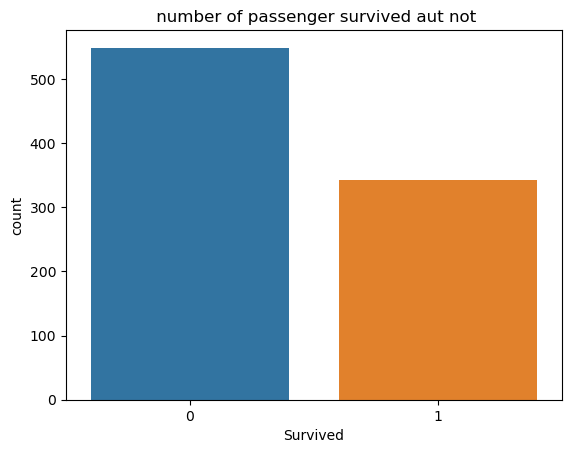

In [20]:
# check for balance and imbalaced dataset.

sns.countplot(data['Survived'])
plt.title(" number of passenger survived aut not")

In [21]:
value_counts=data[["Survived"]].value_counts()

In [22]:
value_counts

Survived
0           549
1           342
dtype: int64

In [23]:
# check the percentage
ratio=(value_counts/value_counts.sum())*100

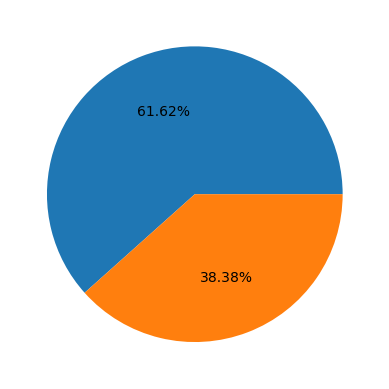

0    549
1    342
Name: Survived, dtype: int64


In [24]:
# looking for imbalance data.
im=data["Survived"].value_counts()
plt.pie(im,autopct="%.2f%%")
plt.show()
print(im)

# performing Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
onehot=OneHotEncoder()

In [27]:
cat_columns=["Sex","Embarked"]

In [28]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [29]:
encoded_data=onehot.fit_transform(data[cat_columns])

In [30]:
encoded_data

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [31]:
#  convert into dataFrame

encoded_df=pd.DataFrame(encoded_data.toarray(),columns=onehot.get_feature_names(cat_columns))

In [32]:
encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [33]:
titanic_encoded_df=pd.concat([data,encoded_df],axis=1)

In [34]:
titanic_encoded_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [35]:
titanic_encoded_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [36]:
titanic_encoded=titanic_encoded_df.drop(["Sex","Embarked","Sex_female","Embarked_S"],axis=1)

In [37]:
titanic_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,22.000000,1,0,7.2500,1.0,0.0,0.0
1,1,1,38.000000,1,0,71.2833,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,0.0
4,0,3,35.000000,0,0,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1.0,0.0,0.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,1.0,0.0


In [38]:
# independent variable.
x=titanic_encoded.iloc[:,1:]

In [39]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.000000,1,0,7.2500,1.0,0.0,0.0
1,1,38.000000,1,0,71.2833,0.0,1.0,0.0
2,3,26.000000,0,0,7.9250,0.0,0.0,0.0
3,1,35.000000,1,0,53.1000,0.0,0.0,0.0
4,3,35.000000,0,0,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1.0,0.0,0.0
887,1,19.000000,0,0,30.0000,0.0,0.0,0.0
888,3,29.699118,1,2,23.4500,0.0,0.0,0.0
889,1,26.000000,0,0,30.0000,1.0,1.0,0.0


In [40]:
# dependent variable.
y=titanic_encoded["Survived"]

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
x.shape

(891, 8)

In [43]:
y.shape

(891,)

In [44]:
# train test split
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RFC= RandomForestClassifier(random_state = 0,n_estimators=20)

In [48]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
pred=RFC.predict(x_test)

In [51]:
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [52]:
acc=accuracy_score(pred,y_test)

In [53]:
acc

0.7430167597765364

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(pred,y_test))

[[93 25]
 [21 40]]


In [56]:
acc=(92+41)/(92+23+23+41)
acc

0.7430167597765364

In [57]:
from sklearn import tree

[Text(0.22502148218294052, 0.9722222222222222, 'X[1] <= 5.5\ngini = 0.473\nsamples = 451\nvalue = [438, 274]'),
 Text(0.03591470258136925, 0.9166666666666666, 'X[7] <= 0.5\ngini = 0.298\nsamples = 21\nvalue = [6, 27]'),
 Text(0.026936026936026935, 0.8611111111111112, 'X[1] <= 2.5\ngini = 0.18\nsamples = 19\nvalue = [3, 27]'),
 Text(0.017957351290684626, 0.8055555555555556, 'X[5] <= 0.5\ngini = 0.375\nsamples = 9\nvalue = [3, 9]'),
 Text(0.008978675645342313, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]'),
 Text(0.026936026936026935, 0.75, 'X[2] <= 2.0\ngini = 0.49\nsamples = 5\nvalue = [3, 4]'),
 Text(0.017957351290684626, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(0.03591470258136925, 0.6944444444444444, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.03591470258136925, 0.8055555555555556, 'gini = 0.0\nsamples = 10\nvalue = [0, 18]'),
 Text(0.04489337822671156, 0.8611111111111112, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.4141282617845118, 0.

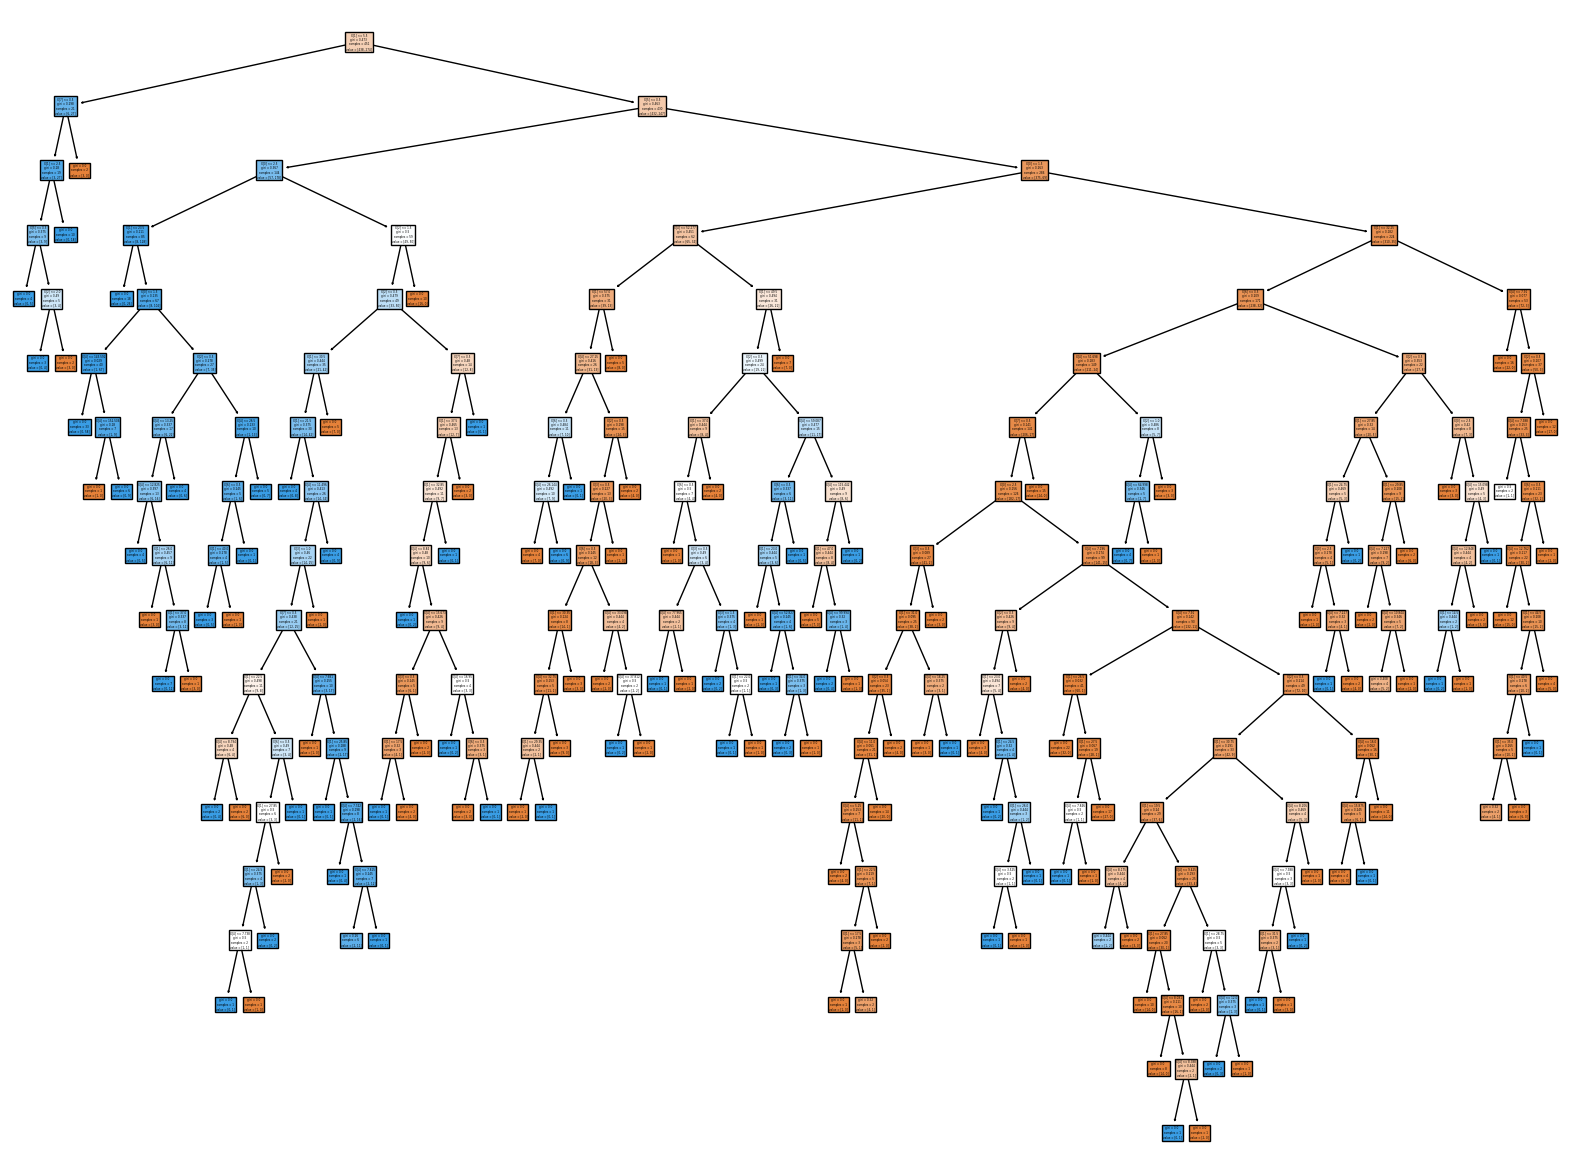

In [58]:
plt.figure(figsize=(20,15))
tree.plot_tree(RFC.estimators_[15],filled=True)

In [59]:
param_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100]}

In [60]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFC,param_grid=param_grid,cv=5,verbose=True)

In [61]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=True)

In [62]:
final_model_RF=grid_search.best_estimator_

In [63]:
final_model_RF

RandomForestClassifier(n_estimators=40, random_state=0)

In [64]:
RFC1=RandomForestClassifier(random_state=0,n_estimators=80)

In [65]:
RFC1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [66]:
pred1=RFC1.predict(x_test)

In [67]:
pred1

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [68]:
acc1=accuracy_score(pred1,y_test)

In [69]:
acc1

0.7541899441340782

In [70]:
RFC2 = RandomForestClassifier(random_state=0, n_estimators = 60)

In [71]:
RFC2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
pred2=RFC2.predict(x_test)

In [74]:
pred2


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [75]:
acc2=accuracy_score(pred2,y_test)

In [76]:
acc2

0.7430167597765364